## Предсказание наличия сердечно сосудистых заболеваний для снижения трат компании на ДМС

Ссылка на легенду: https://docs.google.com/document/d/1cK-RXPZHYtcNAt_nKLtv54HKRriwNMfsqVP5M5KVlTg/edit#heading=h.jh48trjklzvz  
Ссылка на данные: https://www.kaggle.com/volodymyrgavrysh/heart-disease

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('processed_cleveland.csv', delimiter=',')
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

## Attribute Information:
**Age**: Age  
**Sex**: Sex (1 = male; 0 = female)  
**ChestPain**: Chest pain (typical, asymptotic, nonanginal, nontypical)  
**RestBP**: Resting blood pressure  
**Chol**: Serum cholestoral in mg/dl  
**Fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
**RestECG**: Resting electrocardiographic results  
**MaxHR**: Maximum heart rate achieved  
**ExAng**: Exercise induced angina (1 = yes; 0 = no)  
**Oldpeak**: ST depression induced by exercise relative to rest  
**Slope**: Slope of the peak exercise ST segment  
**Ca**: Number of major vessels colored by flourosopy (0 - 3)  
**Thal**: (3 = normal; 6 = fixed defect; 7 = reversable defect)  
**target**: AHD - Diagnosis of heart disease (1 = yes; 0 = no)  

In [3]:
pd.set_option("display.precision", 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
# Заполняем пропуски, редактируем целевую переменную
df["ca"] = df["ca"].replace('?', np.NaN)
df["thal"] = df["thal"].replace('?', np.NaN)
df["ca"] = df["ca"].astype('float64')
df["thal"] = df["thal"].astype('float64')
df["ca"] = df["ca"].fillna(round(df["ca"].mean()))
df["thal"] = df["thal"].fillna(round(df["thal"].mean()))
df["target"] = df["target"].replace([2, 3, 4], 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
df.describe()

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.44    0.68    3.16    131.69  246.69    0.15     0.99   149.61   
std      9.04    0.47    0.96     17.60   51.78    0.36     0.99    22.88   
min     29.00    0.00    1.00     94.00  126.00    0.00     0.00    71.00   
25%     48.00    0.00    3.00    120.00  211.00    0.00     0.00   133.50   
50%     56.00    1.00    3.00    130.00  241.00    0.00     1.00   153.00   
75%     61.00    1.00    4.00    140.00  275.00    0.00     2.00   166.00   
max     77.00    1.00    4.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.60    0.68    4.74    0.46  
std      0.47     1.16    0.62    0.93    1.93    0.50  
min      0.00     0.00    1.00    0.00    3.00    0.00  
25%      0.00     0.00    1.00    0.00    3.00    0.00  
50%      0.00     0.80    2.00    0.00    3.00    0.00  
75%      1.00     1.60    2.00    1.00    7.00    1.00  
max      1.00     6.20    3.00    3.00    7.00    1.00

In [7]:
# Преобразуем закодированные числами значения в категорийные для удобства интерпретации
# Расшифровка значений взята из https://archive.ics.uci.edu/ml/datasets/Heart+Disease
df_cat = df.copy()
df_cat["sex"] = df_cat["sex"].replace([0, 1], ["female", "male"]).astype("category")
df_cat["cp"] = df_cat["cp"].replace([1, 2, 3, 4], ["typical angina", "nontypical angina", "non-anginal", "asymptomatic"]).astype("category")
df_cat["fbs"] = df_cat["fbs"].replace([0, 1], ["<= 120", "> 120"]).astype("category")
df_cat["restecg"] = df_cat["restecg"].replace([0, 1, 2], ["normal", "abnormality", "probable lvh"]).astype("category")
df_cat["exang"] = df_cat["exang"].replace([0, 1], ["no", "yes"]).astype("category")
df_cat["slope"] = df_cat["slope"].replace([1, 2, 3], ["upsloping", "flat", "downsloping"]).astype("category")
df_cat["thal"] = df_cat["thal"].replace([3, 6, 7], ["normal", "fixed defect", "reversable defect"]).astype("category")
df_cat["target"] = df_cat["target"].replace([0, 1], ["healthy", "ill"]).astype("category")

df_cat.head()


age     sex                 cp  trestbps   chol     fbs       restecg  \
0  63.0    male     typical angina     145.0  233.0   > 120  probable lvh   
1  67.0    male       asymptomatic     160.0  286.0  <= 120  probable lvh   
2  67.0    male       asymptomatic     120.0  229.0  <= 120  probable lvh   
3  37.0    male        non-anginal     130.0  250.0  <= 120        normal   
4  41.0  female  nontypical angina     130.0  204.0  <= 120  probable lvh   

   thalach exang  oldpeak        slope   ca               thal   target  
0    150.0    no      2.3  downsloping  0.0       fixed defect  healthy  
1    108.0   yes      1.5         flat  3.0             normal      ill  
2    129.0   yes      2.6         flat  2.0  reversable defect      ill  
3    187.0    no      3.5  downsloping  0.0             normal  healthy  
4    172.0    no      1.4    upsloping  0.0             normal  healthy

## Распределение данных

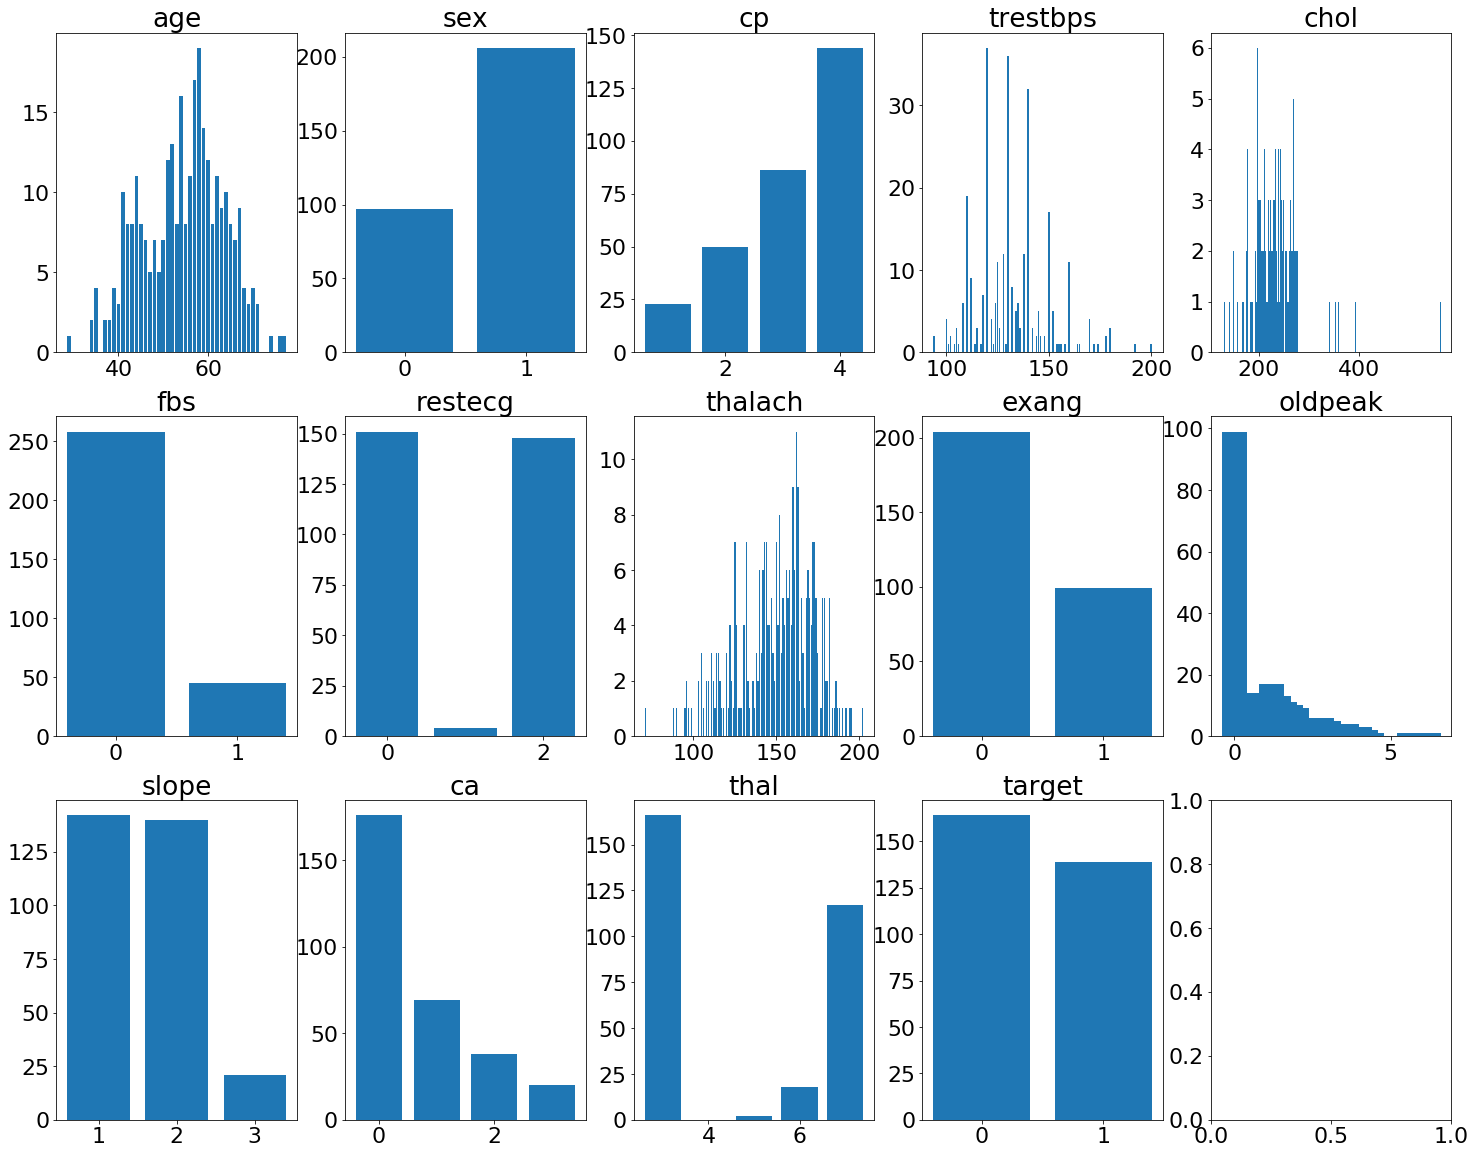

In [8]:
import matplotlib.pyplot as plt
import matplotlib

N_ROWS = 3
N_COLUMNS = 5

def show_distribution(data):
    matplotlib.rcParams.update({'font.size': 22})
    fig, axs = plt.subplots(N_ROWS, N_COLUMNS, figsize=(25, 20))
    row_index = 0
    
    for i in range(0, data.shape[1]):        
        vc = data.iloc[:, i].value_counts()
        axs[row_index, i % N_COLUMNS].bar(vc.index, vc)
        axs[row_index, i % N_COLUMNS].set_title(data.columns[i])
        if(i % N_COLUMNS == 4 and i != 0):
            row_index += 1
    
show_distribution(df)    

## Корреляция параметров с целевой переменной

In [9]:
from matplotlib.pyplot import figure


def calculate_corr(data):
    corr_list = [df.iloc[:, i].corr(df['target']) for i in range(0, df.shape[1] - 1)]
    return corr_list


corr_list = calculate_corr(df)
print(corr_list)
matplotlib.rcParams.update({'font.size': 10})
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(df.columns[:-1], corr_list)
plt.title('Корреляция с целевой переменной')
plt.show()
    

[0.22312029469045153, 0.27681631639209797, 0.41444638790514093, 0.15082544959450628, 0.0851636113995313, 0.025263666975726205, 0.16920188657375576, -0.4171668769579608, 0.4318939871885011, 0.42451018334166063, 0.3392131594836682, 0.45528000106675814, 0.5239702211424861]


In [10]:
# Посмторим корреляции между свойствами
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

Приведенные выше графики показывают, что при исследовании набора данных особое внимание следует уделить болям в груди, максимальному сердцебиению и депрессии ST-сегмента на ЭКГ.

In [11]:
import seaborn as sns 
import scipy.stats
import matplotlib.pyplot as plt

sns.pairplot(df_cat, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target', plot_kws=dict(s = 25, alpha = 0.5))\
            .fig.suptitle('Распределение численных свойств относительно целевой переменной')
plt.subplots_adjust(top=0.9)
plt.show();

## Боль в груди

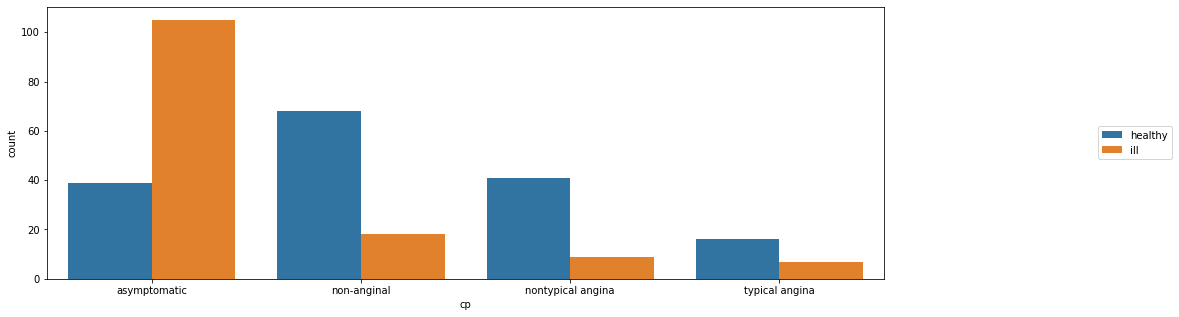

In [12]:
# Проверим корреляцию между видами боли в груди и болезнью сердца
plt.figure(figsize = (15,5))
g = sns.countplot(data = df_cat, x = 'cp', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Как видно из данного графика, наличие нетипичной боли в груди может свидетельствовать об имеющемся сердечном заболевании, в то время как остальные позволяют предположить отсутствие заболевания.

## Максимальное сердцебиение

In [13]:
# Проверим корреляцию между максимальным сердцебиением
heartrate_columns = ["thalach", "target"]
heartrate_corr = df_cat[heartrate_columns]
heartrate_corr_y = heartrate_corr[heartrate_corr["target"] == "ill"].groupby(["thalach"]).size().reset_index(name = "count")
heartrate_corr_y.corr()

thalach  count
thalach     1.00   0.14
count       0.14   1.00

Text(0.5, 1.0, 'График сердцебиения у больных людей')

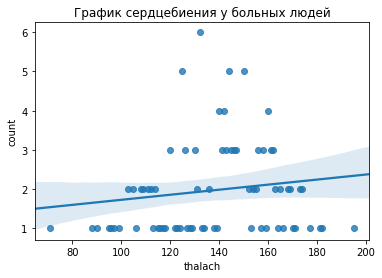

In [14]:
sns.regplot(data = heartrate_corr_y, x = 'thalach', y = 'count').set_title("График сердцебиения у больных людей")

In [15]:
heartrate_corr_n = heartrate_corr[heartrate_corr["target"] == "healthy"].groupby(["thalach"]).size().reset_index(name = "count")
heartrate_corr_n.corr()

thalach  count
thalach     1.00   0.24
count       0.24   1.00

Text(0.5, 1.0, 'График сердцебиения у здоровых людей')

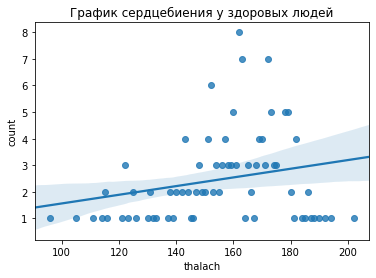

In [16]:
sns.regplot(data = heartrate_corr_n, x = "thalach", y = "count").set_title("График сердцебиения у здоровых людей")

Как видно из приведенных графиков, наше первое впечатление о зависимости заболевания от максимального сердцебиения оказалось ошибочным. И здоровые, и больные пациенты показывают практически одинаковое распределение, поэтому мы не сможем использовать этот параметр для определения диагноза.

## Вызванная нагрузками стенокардия

In [17]:
# Проверим корреляцию между болезнью и вызванной нагрузками стенокардией
exang_col = ["exang", "target"]
exang_corr = df_cat[exang_col]
exang_corr_y = exang_corr[exang_corr["target"] == "ill"].groupby(["exang"]).size().reset_index(name = "count")
exang_corr_y

exang  count
0    no     63
1   yes     76

In [18]:
exang_corr_n = exang_corr[exang_corr["target"] == "healthy"].groupby(["exang"]).size().reset_index(name = "count")
exang_corr_n

exang  count
0    no    141
1   yes     23

In [19]:
g = sns.countplot(data = df_cat, x = 'exang', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Как видно из приведенного графика, 80% случаев наличие стенокардии после физических упражнений сигнализирует о сердечном заболевании.

## ST-депрессия

ST депрессия выявляется в рамках ЭКГ. На картинке ниже отмечен сегмент ST. ST депрессия на ЭКГ проявляется как отклонение вниз от нуля сегмента ST.

<img src="ST depression.png" width=400 height=400>

ST депрессия свидетельствует о субэндокардиальном повреждении, самым распространенным видом которого является ишемия. Ишемия - снижение кровотока, которое провоцирует нехватку кислорода для органов человека. В зависимости от остроты может спровоцировать инфаркт, сказаться на работе других органов человека. Нормальной отклоение - не более 1мм на ЭКГ.

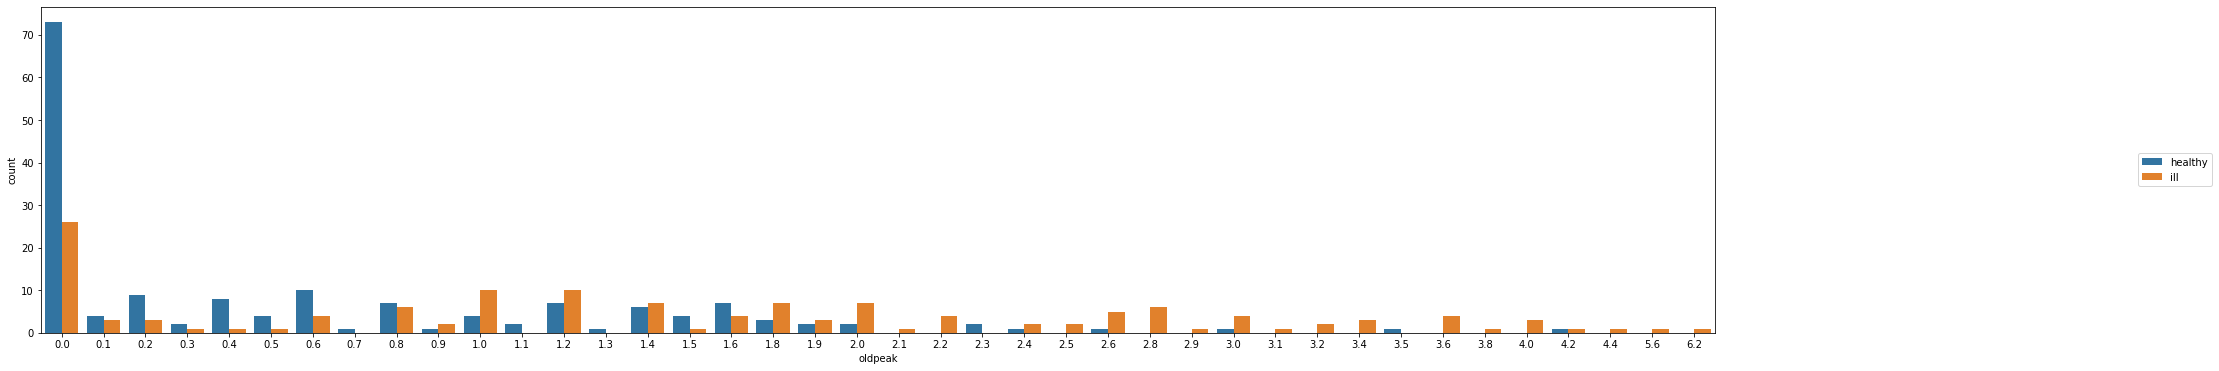

In [20]:
# Проверим корреляцию между ST-депрессией и болезнью
plt.figure(figsize = (30,6))
g = sns.countplot(data = df_cat, x = 'oldpeak', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Как показывает график, наше первое предположение, что ST-депрессия отрицательно коррелирует с сердечными заболеваниями, оказалось ложным. Данный результат получился из-за того, что при увеличении значения депрессии значительно сокращается количество имеющихся наблюдений, как о здоровых, так и о больных пациентах.

Наклон сегмента ST на ЭКГ также может свидетельствовать о наличии заболеваний у человека. 

<img src="ST slope.png" height=400>

In [21]:
# Проверим корреляцию между наклоном ST-сегмента и болезнью
slope_col = ['slope', 'target']
slope_corr = df_cat[slope_col]
slope_corr1 = slope_corr[slope_corr['target'] == 'ill'].groupby(['slope']).size().reset_index(name = 'ill')
slope_corr0 = slope_corr[slope_corr['target'] == 'healthy'].groupby(['slope']).size().reset_index(name = 'healthy')
slope_corr = pd.concat([slope_corr1, slope_corr0['healthy']], axis = 1)
print(slope_corr)
g = sns.countplot(data = df_cat, x = 'slope', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

         slope  ill  healthy
0  downsloping   12        9
1         flat   91       49
2    upsloping   36      106


In [22]:
cont = pd.crosstab(df_cat['slope'],df_cat['target'])
scipy.stats.chi2_contingency(cont)

(45.78459111838959,
 1.1428845467527021e-10,
 2,
 array([[11.36633663,  9.63366337],
        [75.77557756, 64.22442244],
        [76.85808581, 65.14191419]]))

Как видно из приведенного выше графика, отсутствие наклона позволяет судить о наличии у пациента сердечного заболевания, и проверка критерием хи-квадрата подтверждает это предположение. Следует отметить, что в имеющемся наборе данных имеется всего 20 случаев восходящего наклона, если бы таких записей было больше, скорее всего, они бы тоже показали зависимость с заболеваниями.

## Возраст

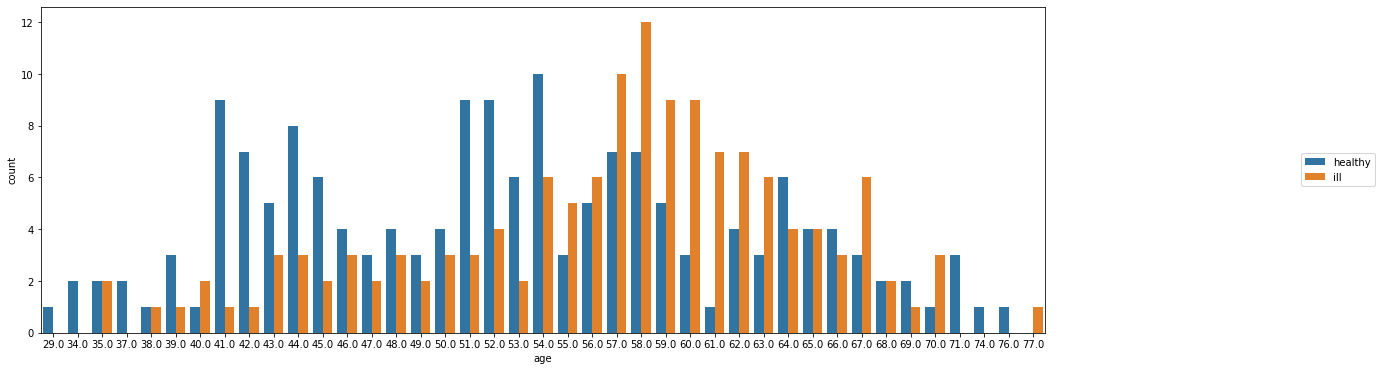

In [23]:
# Проверим корреляцию между возрастом и болезнью
plt.figure(figsize = (18,6))
g = sns.countplot(data = df_cat, x = 'age', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Как видно из приведенного выше графика, возраст оказывает небольшое влияние на вероятность сердечного заболевания. Как мы видим, пик сердечных заболеваний приходится на промежуток 55-65 лет, что можно использовать при обучении модели.

## Пол

In [24]:
# Проверим корреляцию между полом пациента и болезнью
g = sns.countplot(data = df_cat, x = 'sex', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

На основе графика можно было бы сделать вывод, что женщины менее предрасположены к сердечным заболеваниям, ведь в имеющихся данных здоровых количество женщин в три раза превышает больных. Однако следует учитывать, что имеющаяся у нас выборка вновь нерепрезентативна, так как имеется всего 300 записей и количество записей о женщинах в два раза меньше, чем о мужчинах, а значит, мы не можем с уверенностью сказать, в самом деле наблюдается такая тенденция, или это просто выброс.

## Давление

In [25]:
# Проверим корреляцию между давлением в покое и болезнью
restbp_col = ['trestbps', 'target']
restbp_corr = df_cat[restbp_col]
restbp_corr1 = restbp_corr[restbp_corr['target'] == 'ill'].groupby(['trestbps']).size().reset_index(name = 'count')
sns.regplot(data = restbp_corr1, x = 'trestbps', y = 'count').set_title('Корреляция между давлением и болезнью')

Text(0.5, 1.0, 'Корреляция между давлением и болезнью')

In [26]:
restbp_corr0 = restbp_corr[restbp_corr['target'] == 'healthy'].groupby(['trestbps']).size().reset_index(name = 'count')
sns.regplot(data = restbp_corr0, x = 'trestbps', y = 'count').set_title('Корреляция между давлением и здоровьем')

Text(0.5, 1.0, 'Корреляция между давлением и здоровьем')

Можно заметить, что имеется очень слабая корреляция между давлением и наличием болезни. Можно предположить, что при повышенном давлении пациент с большей вероятностью окажется болен, но возможно, наблюдается случайный выброс.

## Холестерин

In [30]:
# Проверим корреляцию между уровнем холестерина и болезнью
chol_col = ['chol', 'target']
chol_corr = df_cat[chol_col]
chol_corr1 = chol_corr[chol_corr['target'] == 'ill'].groupby(['chol']).size().reset_index(name = 'count')
sns.regplot(data = chol_corr1, x = 'chol', y = 'count').set_title('Корреляция между холестерином и болезнью').figure.set_size_inches(15, 8)

In [31]:
chol_corr0 = chol_corr[chol_corr['target'] == 'healthy'].groupby(['chol']).size().reset_index(name = 'count')
sns.regplot(data = chol_corr0, x = 'chol', y = 'count').set_title('Корреляция между холестерином и здоровьем').figure.set_size_inches(15, 8)

Наблюдается слабая обратная зависимость между уровнем холестерина и риском сердечных заболеваний.

## Сахар

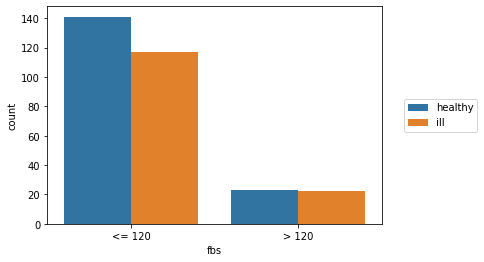

In [32]:
# Проверим корреляцию между уровнем сахара и сердечными заболеваниями
g = sns.countplot(data = df_cat, x = 'fbs', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

Не удалось обнаружить связь между уровнем сахара в крови и сердечными заболеваниями, соотношение больных и здоровых примерно одинаково в обеих группах.

## ЭКГ

        restecg  count
0   abnormality      3
1        normal     56
2  probable lvh     80
        restecg  count
0   abnormality      1
1        normal     95
2  probable lvh     68


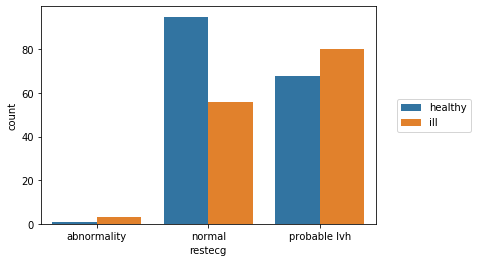

In [27]:
# Проверим корреляцию между результатами ЭКГ в покое и болезнью
restecg_col = ['restecg', 'target']
restecg_corr = df_cat[restecg_col]
restecg_corr1 = restecg_corr[restecg_corr['target'] == 'ill'].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr0 = restecg_corr[restecg_corr['target'] == 'healthy'].groupby(['restecg']).size().reset_index(name = 'count')
print(restecg_corr1)
print(restecg_corr0)
g = sns.countplot(data = df_cat, x = 'restecg', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

In [28]:
cont = pd.crosstab(df_cat['restecg'],df_cat['target'])
scipy.stats.chi2_contingency(cont)

(10.051541372646057,
 0.006566523814217354,
 2,
 array([[ 2.1650165 ,  1.8349835 ],
        [81.72937294, 69.27062706],
        [80.10561056, 67.89438944]]))

Как видно из приведенного выше графика, наблюдение результатов ЭКГ, отличных от нормы, может свидетельствовать о наличии сердечного заболевания. Проверка критерием хи-квадрата подтверждает это предположение (P = 0.007).

## Сосуды

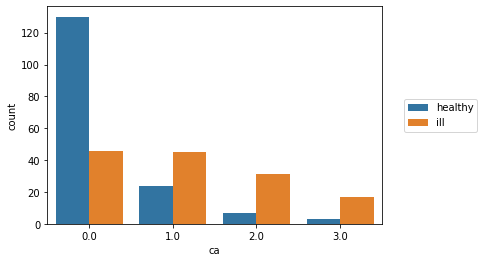

In [30]:
# Проверим корреляцию между количеством обнаруженных при флюорографии сосудов (?) и болезнью
g = sns.countplot(data = df_cat, x = 'ca', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

Если не было обнаружено ни одного крупного сосуда, это может говорить о здоровье пациента.

## Изотопное сканирование

   thal  ill  healthy
0   3.0   37      129
1   5.0    1        1
2   6.0   12        6
3   7.0   89       28


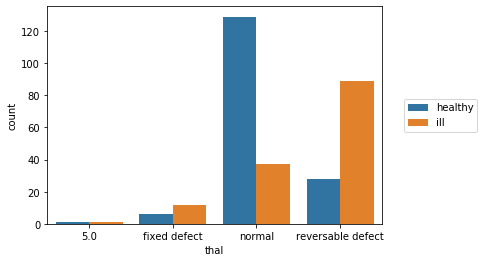

In [31]:
# Проверим связь между результатами изотопного сканирования и болезнью
slope_col = ['thal', 'target']
slope_corr = df[slope_col]
slope_corr1 = slope_corr[slope_corr['target'] == 1].groupby(['thal']).size().reset_index(name = 'ill')
slope_corr0 = slope_corr[slope_corr['target'] == 0].groupby(['thal']).size().reset_index(name = 'healthy')
slope_corr = pd.concat([slope_corr1, slope_corr0['healthy']], axis = 1)
print(slope_corr)
g = sns.countplot(data = df_cat, x = 'thal', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

Как можно видеть из графика, приведенного выше, при результатах сканирования, отличных от нормы, мы можем уверенно говорить о том, что пациент страдает от сердечного заболевания.

## Обучение моделей

Приступим к обучению моделей. Сначала отберем те признаки, которые оказались важными для нахождения заболеваний,  а именно столбцы:
1) ca.  
2) thal.  
3) restecg.  
4) slope.  
5) cp.  
6) age.  
7) exang.  

In [32]:
train_columns = ['ca', 'thal', 'restecg', 'slope', 'cp', 'target']
final_df = df[train_columns]
final_df.head()

ca  thal  restecg  slope   cp  target
0  0.0   6.0      2.0    3.0  1.0       0
1  3.0   3.0      2.0    2.0  4.0       1
2  2.0   7.0      2.0    2.0  4.0       1
3  0.0   3.0      0.0    3.0  3.0       0
4  0.0   3.0      2.0    1.0  2.0       0

In [33]:
final_df = final_df.dropna()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 6 columns):
ca         303 non-null float64
thal       303 non-null float64
restecg    303 non-null float64
slope      303 non-null float64
cp         303 non-null float64
target     303 non-null int64
dtypes: float64(5), int64(1)
memory usage: 16.6 KB


Закодируем переменные для использования в моделях.

Делим выборку на тренировочную и тестовую.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, :-1], final_df.iloc[:, -1:],
                                                    test_size=0.33, random_state=0)

X_train.head()

ca  thal  restecg  slope   cp
252  1.0   7.0      0.0    2.0  4.0
54   1.0   7.0      0.0    1.0  4.0
234  1.0   3.0      0.0    1.0  3.0
18   0.0   3.0      0.0    1.0  3.0
205  3.0   7.0      2.0    2.0  4.0

Для обучения и сравнения будем использовать 4 модели:
1) Модель логистической регрессии.  
2) SVM для классификации.  
3) Случайный лес.  
4) Градиентный бустинг.  

Тюнинг гиперпараметров будет осуществляться при помощи GridSearchCV.

Импортируем методы и обучаем первую модель.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

logreg = LogisticRegression()

params = {
    'penalty':['l1', 'l2'],
    'solver':['liblinear']
}

# logit регрессия
logreg_cv = GridSearchCV(logreg, params)
logreg_cv.fit(X_train, y_train.to_numpy().ravel())

print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

0.8226829268292685
{'penalty': 'l1', 'solver': 'liblinear'}


Проверим качество модели

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        49
           1       0.89      0.67      0.76        51

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



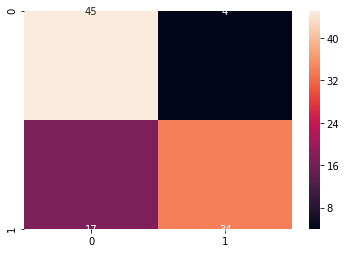

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

logreg_test_predicted = logreg_cv.predict(X_test)
print(classification_report(y_test, logreg_test_predicted))

sns.heatmap(confusion_matrix(y_test, logreg_test_predicted), annot=True, fmt="d")
plt.show()

Обучим SVM для классификации.

In [37]:
# SVM
from sklearn.svm import SVC

svc = SVC()

params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr']
}

svc_cv = GridSearchCV(svc, params)
svc_cv.fit(X_train, y_train.to_numpy().ravel())

print(svc_cv.best_score_)
print(svc_cv.best_params_)

0.8425609756097563
{'decision_function_shape': 'ovo', 'kernel': 'poly'}


Проверим качество SVC.

              precision    recall  f1-score   support

           0       0.70      0.92      0.80        49
           1       0.89      0.63      0.74        51

    accuracy                           0.77       100
   macro avg       0.80      0.77      0.77       100
weighted avg       0.80      0.77      0.77       100

[[45  4]
 [19 32]]


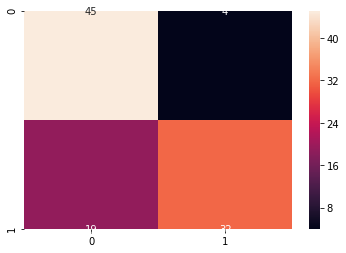

In [38]:
svc_test_predicted = svc_cv.predict(X_test)

print(classification_report(y_test, svc_test_predicted))

print(confusion_matrix(y_test, svc_test_predicted))
sns.heatmap(confusion_matrix(y_test, svc_test_predicted), annot=True, fmt="d")
plt.show()

Обучим модель случайного леса.

In [39]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

params = {
    'n_estimators':[50, 100, 150, 200, 250],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.25, 0.5, 1.0],
    'n_jobs': [-1]
}

random_forest_cv = GridSearchCV(random_forest, params)
random_forest_cv.fit(X_train, y_train.to_numpy().ravel())

print(random_forest_cv.best_score_)
print(random_forest_cv.best_params_)

0.8132926829268292
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': -1}


Проверим качество полученной модели.

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        49
           1       0.82      0.61      0.70        51

    accuracy                           0.73       100
   macro avg       0.75      0.73      0.73       100
weighted avg       0.75      0.73      0.73       100

[[42  7]
 [20 31]]


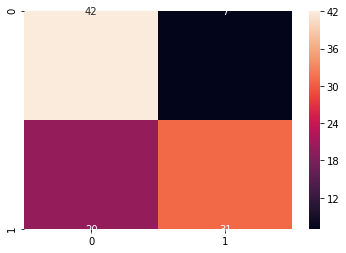

In [40]:
random_forest_test_predicted = random_forest_cv.predict(X_test)
print(classification_report(y_test, random_forest_test_predicted))
print(confusion_matrix(y_test, random_forest_test_predicted))
sns.heatmap(confusion_matrix(y_test, random_forest_test_predicted), annot=True, fmt="d")
plt.show()

Обучим последнюю модель - градиентный бустинг.

In [41]:
# GBM
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier()

params = {
    'ccp_alpha': [0.0, 0.2],
    'learning_rate': [0.1, 0.05, 0.3],
    'max_depth':[3, 5, 7],
    'n_estimators': [50, 100, 150, 200],
}

GBM_cv = GridSearchCV(GBM, params)
GBM_cv.fit(X_train, y_train.to_numpy().ravel())

print(GBM_cv.best_score_)
print(GBM_cv.best_params_)

0.8079268292682927
{'ccp_alpha': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


Проверим качество обученной модели.

              precision    recall  f1-score   support

           0       0.75      0.90      0.81        49
           1       0.88      0.71      0.78        51

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

[[44  5]
 [15 36]]


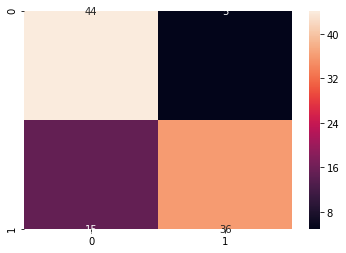

In [42]:
from sklearn.metrics import classification_report
gbm_test_predicted = GBM_cv.predict(X_test)
print(classification_report(y_test, gbm_test_predicted))
print(confusion_matrix(y_test, gbm_test_predicted))

sns.heatmap(confusion_matrix(y_test, gbm_test_predicted), annot=True, fmt="d")
plt.show()

Оценим модели с точки зрения реальной жизни. 
Будем считать, что 10% от всех больных нуждаются в экстренной госпитализации, если у них есть невыявленное ССЗ, в течение года, на который рассчитан ДМС. Стоимость госпитализации - случайное число от $20,396 до $177,546 и эти затраты должна покрыть страховая компания.
Для оценки качества модели с точки зрения реальной жизни будем считать суммарную сумму затрат страховой компании, которая будет складываться следующим образом:   
1) Если пациент здоров, и модель предсказывает, что он здоров - компания тратится только на поверхностное обследование (774 доллара).  
2) Данные, которые получены на начальном обследовании потом необходимы для получения результатов модели.   
Если пациент здоров, но модель предсказала, что у него есть ССЗ, то компания тратит 2,534 - 2,255 долларов на дополнительное обследование (в эту сумму включено начальное обследование).  
3) Если пациент имеет ССЗ, и модель предсказывает, что у него есть ССЗ, то компания тратит деньги на обследование ($2,534 - $2,255), а также впоследствии от 12 до 400 долларов в следующий год на медикаменты в месяц.  
4)  Если пациент имеет ССЗ, а модель предсказывает, что он здоров, то тогда компания теряет стоимость ЭКГ и стоимость госпитализации пациента, которая варьируется от 20,396 до 177,546 долларов с вероятностью 10%.  

Таким образом, если затраты компании при использовании модели и проведения доп. обследования будут меньше, чем без, то можно считать, что модель построена удачно. 

Посчитаем затраты компании, если не проводится доп. обследование.

In [52]:
hospitalization_average = (20396 + 177546)/2
drugs_avetage = (12 + 400)/2
additional_examination_average = (2534 + 225)
examination_price = 174 + 600

Посчитаем траты компании, если модель не используется.

In [44]:
no_examination_cost = len(y_test[y_test['target'] == 1]) * hospitalization_average * 0.1
print("Без использования модели траты составят {} долларов".format(no_examination_cost))

Без использования модели траты составят 504752.10000000003 долларов


In [53]:
def examination_cost(y_true, y_pred):
    confusion_matrix_count = confusion_matrix(y_true, y_pred)
    ill_truth_count = confusion_matrix_count[1][1]
    health_truth_count = confusion_matrix_count[0][0]
    ill_predicted_health_truth_count = confusion_matrix_count[1][0]
    health_predicted_ill_truth_count = confusion_matrix_count[0][1]
    
    ill_cost = (additional_examination_average + drugs_avetage) * ill_truth_count
    health_cost = examination_price * health_truth_count
    ill_predicted_health_truth_cost = additional_examination_average * ill_predicted_health_truth_count
    health_predicted_ill_truth_cost = (hospitalization_average + examination_price) * health_predicted_ill_truth_count * 0.1
    return ill_cost + health_cost + ill_predicted_health_truth_cost + health_predicted_ill_truth_cost
    

In [54]:
print("При использовании логистической регрессии траты составят {} долларов".format(examination_cost(y_test, logreg_test_predicted)))
print("При использовании SVC траты составят {} долларов".format(examination_cost(y_test, svc_test_predicted)))
print("При использовании GBM траты составят {} долларов".format(examination_cost(y_test, gbm_test_predicted)))
print("При использовании случайного леса траты составят {} долларов".format(examination_cost(y_test, random_forest_test_predicted)))

При использовании логистической регрессии траты составят 222441.0 долларов
При использовании SVC траты составят 222029.0 долларов
При использовании GBM траты составят 232053.5 долларов
При использовании случайного леса траты составят 249424.5 долларов


Как видно по результатам каждая модель позволяет почти **в два раза** снизить затраты страховой компании при своевременном выявлении ССЗ, по сравнению с ситуацией, когда обследование не производится. 